seat rotation
---

partners sat in seat X one day, then seat X+1, then X+2...
"Tony" liked seat 24. So everyone skipped 24.

>David,
>
>Here’s the seat rotation plan we used in NZ.   According to the guide, it was determined by some mathematician.  Our number was 22.  The first day I was 5 seats behind the driver, the next day we moved to #23.  “Tony” liked to sit way in the back so we all skipped 24 , then went to #1 spot.
>
>And as I mentioned , there were a few open seats so Dad & I would split up to have more space.  Of course,  people forgot where they sat and sometimes caused confusion  :) !  Anyway, it was good to have some kind of plan so the same people didn’t always get the front  / best view.
>
>Do you think it is just random?

![seat](seats.png)

Give each seat a row and a side.

In [21]:
seat_numbers = [1,14,18,10,7,21,15,4,22,8,16,'toilet',3,'back door',9,12,5,23,20,17,11,2,19,6,24,13]

rows = [ [row, row] for row in range(1,14)]
rows = [ row_num
        for row in rows
        for row_num in row
       ]
RLs = [ ['R', 'L'] for row in range(13)]
RLs = [ side
       for row in RLs
       for side in row ]
seats = {
    seat_number:{
        'row':row,
        'side':side,
        'side_no':(0 if side == 'L' else 1)
    }
    for seat_number, row, side in zip(seat_numbers, rows, RLs)
}

In [30]:
import numpy as np
import seaborn as sns

def get_seat_position(seat_key):
    seat = seats[seat_key]
    row = seat['row']
    side_no = seat['side_no']
    return [row, side_no]

def seat_distance(seat1, seat2):
    position1 = np.array(get_seat_position(seat1))
    position2 = np.array(get_seat_position(seat2))
    return np.linalg.norm(position2-position1)

In [69]:
distances = [ [seat1, seat2, seat_distance(seat1, seat2)]
             for seat1 in seats
             for seat2 in seats
            ]

# # sns.heatmap(distances)


<Axes: >

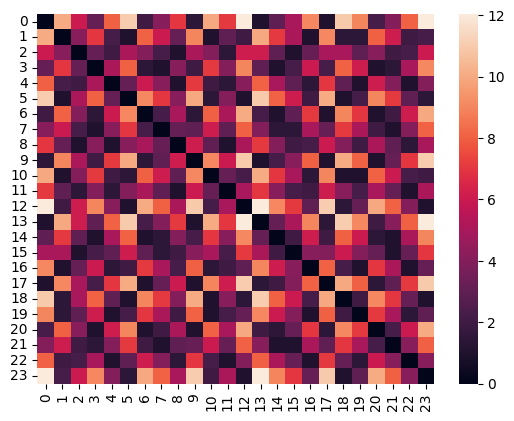

In [125]:
import pandas as pd
df = pd.DataFrame(distances, columns = ['seat1','seat2','distance'])
sorted_df = df.where(~((df == 'toilet') | (df == 'back door')), other = np.nan).dropna().sort_values(by = ['seat1','seat2']).astype(float)
distance_matrix = sorted_df.to_numpy()
distance_matrix = distance_matrix[:,2].reshape((24,24)).astype(float)

sns.heatmap(sorted_df['distance'].to_numpy().reshape((24,24)))